# Exploratory Data Analysis on the classic Titanic Dataset

>This notebook consists of the data preprocessing and analysis conducted on the titanic dataset that was downloaded from  [Kaggle](https://www.kaggle.com/c/titanic/data?select=train.csv)

#### Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [2]:
data = pd.read_csv("InitialDataSet.csv")
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


From the above output we can have a brief overview of the dataset in  hand. Now, let's have a look at all the available features.

In [3]:
list(data.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Here is a minimal description of above features present based on the data dictionary that was provided.
* PassengerId  , Name : The Attribute assigned to each passengers onboard.
* Survived : Data regarding the passengers mortality. Keys 0 and 1 which refer to No and Yes respectively.
* Sex : Gender. Categorized as male and female.
* Age : The recorded age of the passenger in number.
* SibSp : The total number of siblings and spouse of the passenger.
* Parch : The total number of parents and child of the passenger.
* Ticket : Reference to the passenger's ticket.
* Cabin : The Cabin Number the passenger was assigned to. 
* Embarked : Port of the passengers embarkment or Destination Spot. Keys C = Cherbourg, Q = Queenstown, S = Southampton

## Missing Data Handling 

After gaining the necessary familiarity with the assigned dataset, the task is to check in and visualize the missing values and also handle it suitably. So, initially, lets begin with the quest for finding the whereabouts of the missing data in our entire dataset. 

#### Total Missing Values In Each Features 

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From this, we know that there are 177 missing values in the age column , 687 on the Cabin and 2 on the embarked.

#### Data Visualization of the Missing Values

<AxesSubplot:>

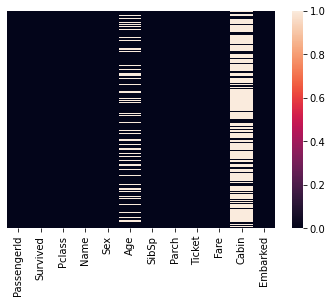

In [5]:
sns.heatmap(data.isnull(), yticklabels = False)

From the above heatmap , we can analyze that the Age and Cabin features of the dataset consists of larger intensity of null values.

####  Handling The Unnecessary Columns

In [6]:
# dropping the "Cabin" column from the dataframe
data = data.drop(columns='Cabin', axis=1)

As part of the missing data handling process, the Cabin column was dropped entirely as it appeared inefficeint due to the lack of credential amount of data present in it.

## A Closer Look Into the Data With Visualization

The next step is to better understand the dataset we have. For this, we will build our analysis on each of the columns present in the dataset with the help of python's data visualization library seaborn. 

#### Survived To Not Survived Visulation

<AxesSubplot:xlabel='Survived', ylabel='count'>

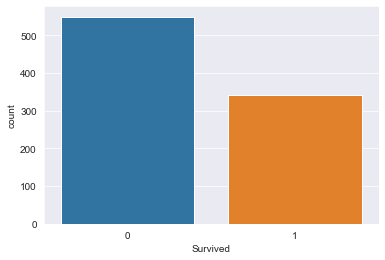

In [7]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=data)

From the above drawn countplot, we can visualize that the dataset consists of the details of larger number of passengers who died on the ship compared to the ones who survived it. 

##### Computing the total number of people who survived and did not survive 

In [8]:
print(f"The total number of people who survived the ship is {data['Survived'].value_counts()[1]} and the ones who died is {data['Survived'].value_counts()[0]}.")  

The total number of people who survived the ship is 342 and the ones who died is 549.


#### Male to Female Ratio Visualization

<AxesSubplot:xlabel='Sex', ylabel='count'>

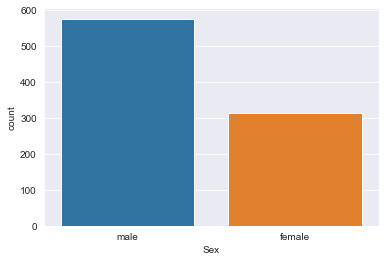

In [9]:
sns.countplot(x='Sex',data=data)

From the above graphical representation, we can see that there are more number of male passengers compared to female. 

###### Computing the respective numbers of  male and female passengers

In [10]:
dict(data['Sex'].value_counts())

{'male': 577, 'female': 314}

#### Visualizing the Passenger Count On Each of the Destination Spots

<AxesSubplot:xlabel='Embarked', ylabel='count'>

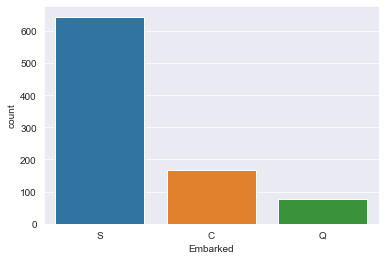

In [11]:
sns.countplot(x='Embarked',data=data)

##### Computing the value counts on respective embarkments

In [12]:
dict(data['Embarked'].value_counts())

{'S': 644, 'C': 168, 'Q': 77}

#### Visualizing the Passenger Count On Each of the Ticket Classes 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

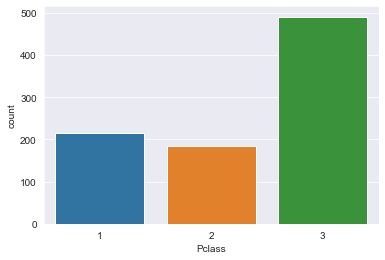

In [13]:
sns.countplot(x='Pclass',data=data)

###### Computing the Passenger Count On Each of the Ticket Classes 

In [14]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### Visuaizing the Majority Age Group 

<AxesSubplot:xlabel='Age'>

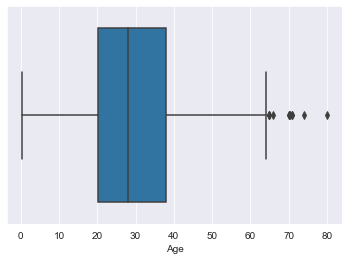

In [15]:
sns.boxplot(x=data["Age"])

From the above boxplot, it is quite evident that most of the passengers fall under the age group of 20 to 39.

(20.0, 30.0)

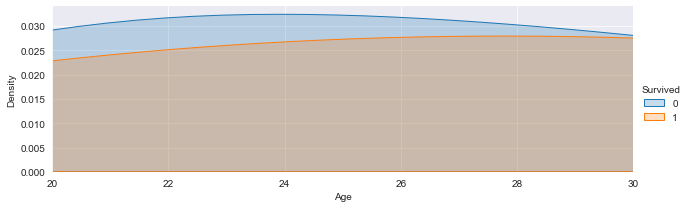

In [22]:
fac = sns.FacetGrid(data,hue = "Survived", aspect = 3)
fac.map(sns.kdeplot,'Age',shade=True)
fac.set(xlim=(0,data["Age"].max()))
fac.add_legend()
plt.xlim(20,30)

#####  Displaying the Unique Ages

In [ ]:
data['Age'].unique()

In [ ]:
dict(data['Age'].value_counts())

This dictionary consists of the total count of passengers belonging to respective ages. 

#### Visualization of Passenger who survived and died From Respective PClass.

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=data)

#### Distinct Visualization of Male and Females who survived or died

In [ ]:
sns.countplot(x ='Sex', hue='Survived', data=data)

#### Visualization of Passenger of different sex and age range who survived and died.

In [ ]:
sns.boxplot(x=data["Age"], y = data["Sex"] , hue= data["Survived"], orient="h", palette="Set3")

Following conlcusions can be drawn from the above resperesntation 
* Females of age group 19 to 38 could survive the shipwreck likewise that belonging to an age range of 16 to 34 died.
* Males of age group 23 to 39 couldnt survive whereas the ones belonging to 18 to 36 did.

#### Graphical Represntation of the Ticket Fare for Embarkments Based On the Pclass.

In [ ]:
plt.figure(figsize = (10,7))
sns.stripplot(x="Pclass", y="Fare", hue="Embarked", jitter= False, data=data)

The above stripplot shows the fare range for various passenger class ticket for respective embarkments as indicated by the index.

#### Visual Represntation of the Age Rang of Passengers Based On their Ticket class.

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

From the above graph , it is evident that the age agroup of passengers with Upper Class ticket that is 1 is between 25 and 50 
whereas that with Middle class is 25 to 35 and finally with the lower is roughly 18 to 33. Thus we will now handle the missing datas of the Age column by situating in the datas with mean values based on the above mentioned conditions.

Using this detail for **handling of the missing data** as:

In [ ]:
def fillAge(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 24

    else:
        return Age

#### Imputing the missing age values with the above logic

In [ ]:
data['Age'] =data[['Age','Pclass']].apply(fillAge,axis=1)

#### Checking the Missing Values In Age Column

In [ ]:
data['Age'].isnull().sum()

#### Visual Verification of Missing Data 

In [ ]:
sns.heatmap(data.isnull(), yticklabels = False)

We still can spot some white pigments on the above heatmap under the embarked columns. This means we still got some work to do.


#### Checking the Missing Values In Age Column

In [ ]:
data['Embarked'].isnull().sum()

#### Computing the mode value of "Embarked" column

In [ ]:
print(data['Embarked'].mode())

#### Handling the missing values in "Embarked" column with the mode value

In [ ]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [ ]:
data.isnull().sum()

In [ ]:
sns.heatmap(data.isnull(), yticklabels = False)

All the missing data has been sucessfully handled.

```
 
 There we go. We did it, HOORAAAAYY !!!!!
 
```

### Statistical Visualization of the data

In [ ]:
data.describe()

In [ ]:
data.info()

The categories name, sex and ticket seems to be of object type. 
>**The goal is to pre-process the dataset and bring down the necessary features into numerical format.**

#### Transforming the Sex , Embarked Columns to categorical Columns

In [ ]:
data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

As both the features consisted of inputs of certain categories the categories were assigned numerical keys and replaced accordingly. This method is also famous as **Label Encoding** .

#### Lets Look How Far We Have Come

In [ ]:
data.head(10)

Okay, so we still got some work to be done here by handling the non-numeric columns. 

#### Dropping the Inefficient Columns

In [ ]:
titanicData = data.drop(columns = ['PassengerId','Name','Ticket'],axis=1)

In [ ]:
titanicData.info()

#### Rearranging the Columns

In [ ]:
colsOrder = ['Age','Sex','Pclass','Fare','SibSp','Parch', 'Embarked', 'Survived']
FinalTitanicDataset = titanicData[colsOrder]

### A Final Look Into Our Pre-processed Dataset

In [ ]:
FinalTitanicDataset.sample(n=10 , ignore_index = True)

### Saving The Refined Data Into a new CSV

In [ ]:
FinalTitanicDataset.to_csv('ReadyToTrain.csv')

> That was it. We now have a properly analyzed and pre-processed dataset that can further be used for traning a ML model.